Training data shape: X_train(800, 10, 1), y_train(800, 1)
Test data shape: X_test(200, 10, 1), y_test(200, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 9.3446 - mae: 2.4675 - val_loss: 8.9242 - val_mae: 2.4022
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.0437 - mae: 1.9105 - val_loss: 1.8366 - val_mae: 1.0706
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1825 - mae: 0.8307 - val_loss: 0.4075 - val_mae: 0.4600
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2970 - mae: 0.4180 - val_loss: 0.2065 - val_mae: 0.3396
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1596 - mae: 0.3057 - val_loss: 0.1403 - val_mae: 0.2855
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1096 - mae: 0.2510 - val_loss: 0.0963 - val_mae: 0.2389
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0876 - mae: 0.2267 - val_loss: 0.0807 - val_mae: 0.2182
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0686 - mae: 0.2060 - val_loss: 0.0719 - val_mae: 0.2031
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.053

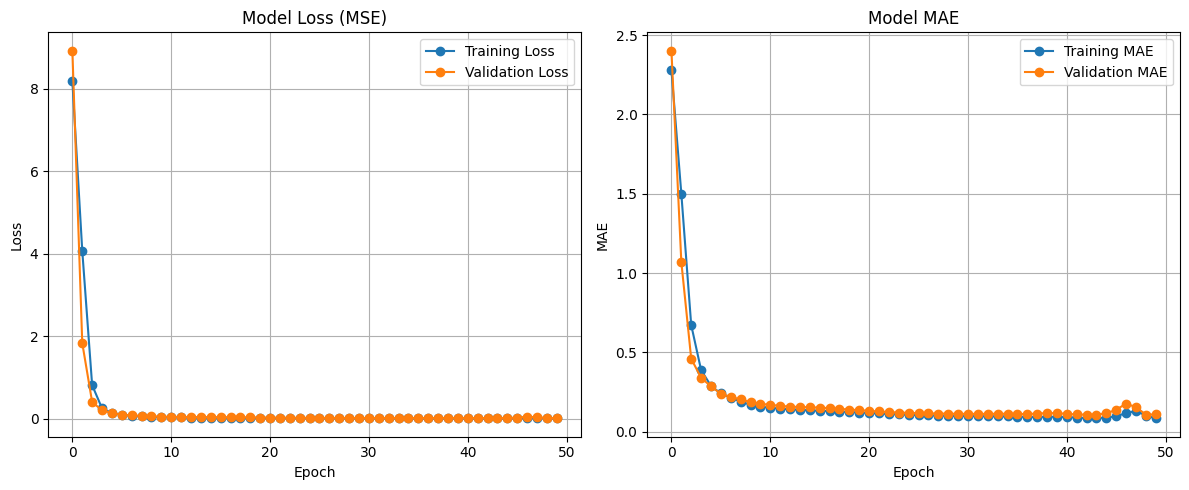

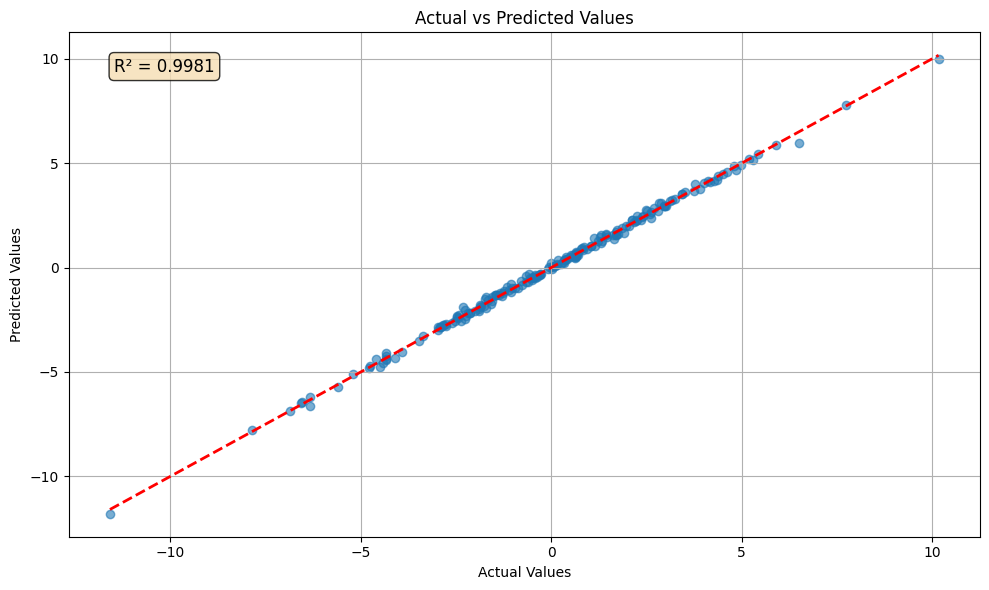

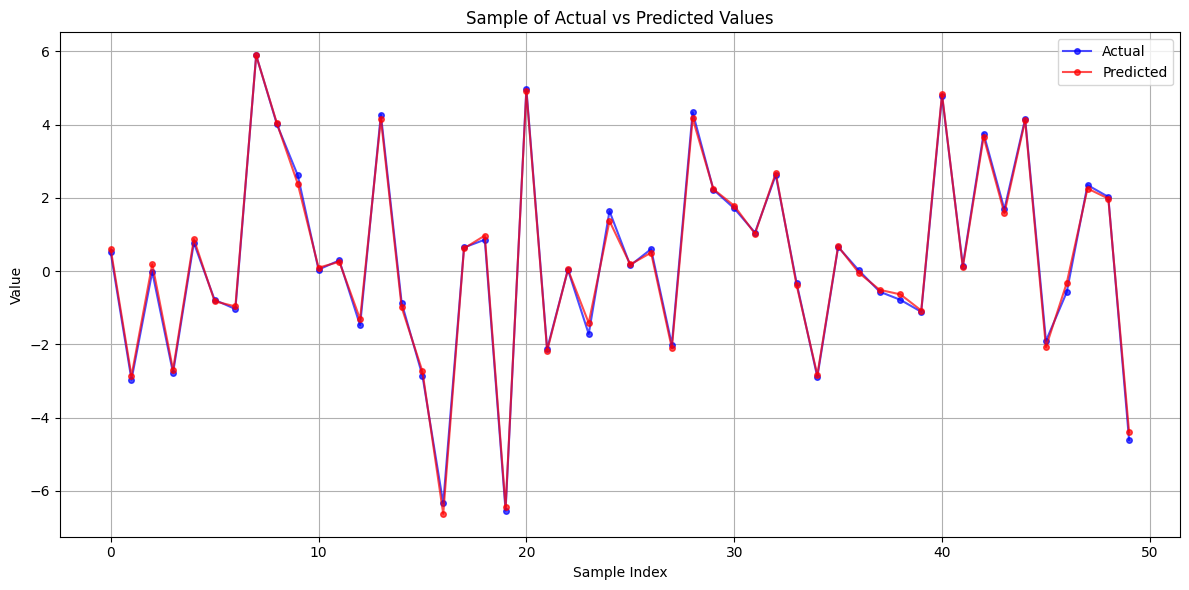


Predictions for new data:
Input sequences (sum of each sequence):
Sequence 1: Sum = 2.0425
Sequence 2: Sum = -1.6079
Sequence 3: Sum = -3.4438
Sequence 4: Sum = -5.0926
Sequence 5: Sum = -3.6189

Model predictions:
Sequence 1: Predicted = 1.9168
Sequence 2: Predicted = -1.7020
Sequence 3: Predicted = -3.4685
Sequence 4: Predicted = -5.0341
Sequence 5: Predicted = -3.6287


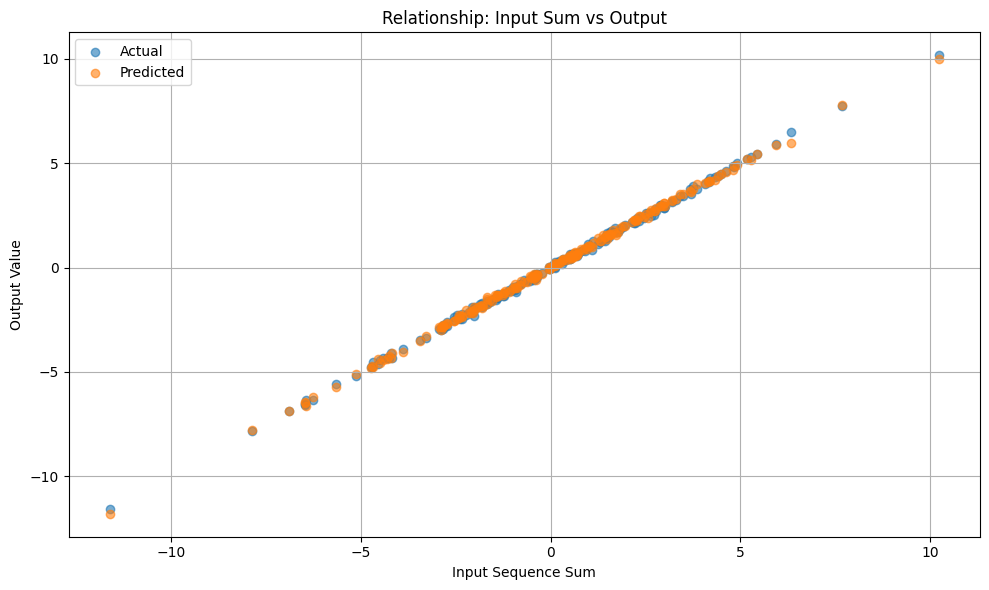

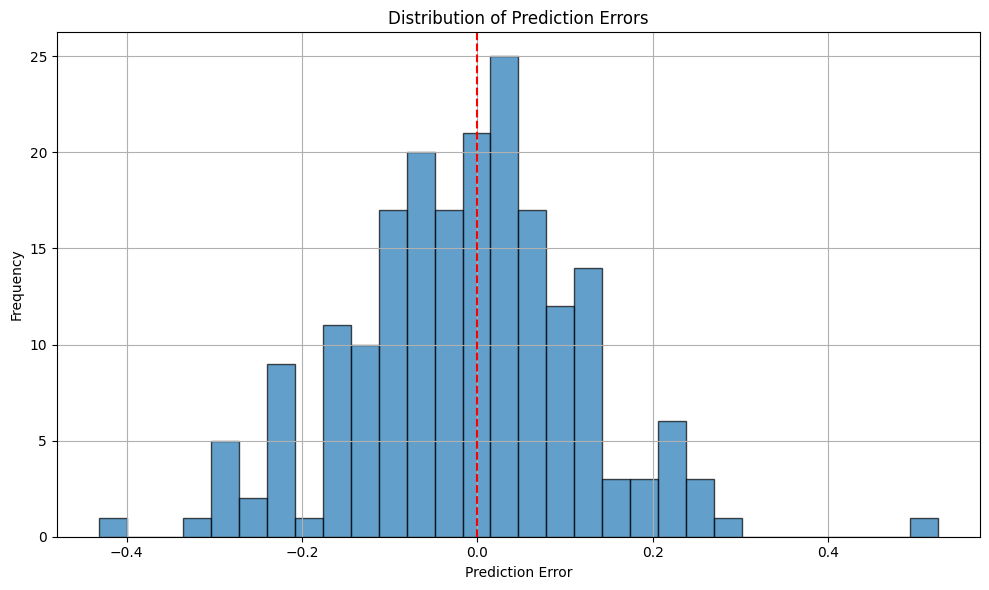


Error Statistics:
Mean Error: -0.0130
Std Error: 0.1300
Min Error: -0.4315
Max Error: 0.5252


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic time series data
seq_length = 10
num_samples = 1000
X = np.random.randn(num_samples, seq_length, 1)
y = X.sum(axis=1) + 0.1 * np.random.randn(num_samples, 1)

# Split the data
split_ratio = 0.8
split_index = int(split_ratio * num_samples)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Training data shape: X_train{X_train.shape}, y_train{y_train.shape}")
print(f"Test data shape: X_test{X_test.shape}, y_test{y_test.shape}")

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(seq_length, 1), return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

# Train the model
batch_size = 32
epochs = 50
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'\nTest Loss (MSE): {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')

# Make predictions
y_pred = model.predict(X_test, verbose=0)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE', marker='o')
plt.plot(history.history['val_mae'], label='Validation MAE', marker='o')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)

# Add R² score to plot
plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Plot sample of predictions vs actual values over time
plt.figure(figsize=(12, 6))
sample_size = min(50, len(y_test))
indices = np.random.choice(len(y_test), sample_size, replace=False)

plt.plot(range(sample_size), y_test[indices].flatten(), 'bo-', label='Actual', alpha=0.7, markersize=4)
plt.plot(range(sample_size), y_pred[indices].flatten(), 'ro-', label='Predicted', alpha=0.7, markersize=4)
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Sample of Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Make predictions on new data
new_data = np.random.randn(5, seq_length, 1)
predictions = model.predict(new_data, verbose=0)

print("\nPredictions for new data:")
print("Input sequences (sum of each sequence):")
for i, seq in enumerate(new_data):
    print(f"Sequence {i+1}: Sum = {seq.sum():.4f}")

print("\nModel predictions:")
for i, pred in enumerate(predictions):
    print(f"Sequence {i+1}: Predicted = {pred[0]:.4f}")

# Additional: Show the actual relationship between input sum and output
plt.figure(figsize=(10, 6))
input_sums = X_test.sum(axis=1).flatten()
plt.scatter(input_sums, y_test, alpha=0.6, label='Actual')
plt.scatter(input_sums, y_pred, alpha=0.6, label='Predicted')
plt.xlabel('Input Sequence Sum')
plt.ylabel('Output Value')
plt.title('Relationship: Input Sum vs Output')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Additional: Error distribution
errors = y_test.flatten() - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\nError Statistics:")
print(f"Mean Error: {errors.mean():.4f}")
print(f"Std Error: {errors.std():.4f}")
print(f"Min Error: {errors.min():.4f}")
print(f"Max Error: {errors.max():.4f}")